In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
#b = pd.read_csv("test.csv")
#b = b.dropna(axis=1)

#df = pd.concat([a,b])
#df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [4]:
print('Valores únicos de cada Variável')
dict=[]
for i in df.columns:
    print(f'{i} --> {df[i].nunique()}')

Valores únicos de cada Variável
id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


### Analisando Gênero

In [9]:
# Presença de homens 10% superior
s = df['Gender']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
s = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})[:5]
print(s.to_markdown())

|        |   counts |      per | per100   |
|:-------|---------:|---------:|:---------|
| Male   |   206089 | 0.540761 | 54.1%    |
| Female |   175020 | 0.459239 | 45.9%    |


Gênero x Seguro Prévio

|    |   Previously_Insured | Gender   |     perc |
|---:|---------------------:|:---------|---------:|
|  0 |                    0 | Male     | 0.57831  |
|  1 |                    0 | Female   | 0.42169  |
|  2 |                    1 | Female   | 0.503636 |
|  3 |                    1 | Male     | 0.496364 |


<AxesSubplot:xlabel='Gender'>

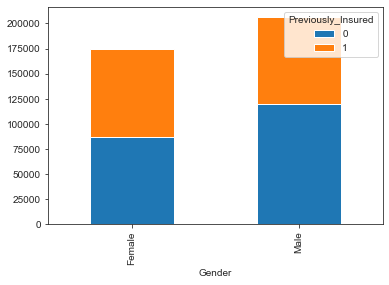

In [44]:

df2 = (df.groupby('Previously_Insured')['Gender']
           .value_counts(normalize=True)
           .reset_index(name='perc'))
           
print((df2).to_markdown())

pd.crosstab(df['Gender'],df['Previously_Insured']).plot.bar(stacked=True) # Homens são mais negligentes?

Gênero x Veículo Danificado

|    | Vehicle_Damage   | Gender   |     perc |
|---:|:-----------------|:---------|---------:|
|  0 | No               | Female   | 0.505337 |
|  1 | No               | Male     | 0.494663 |
|  2 | Yes              | Male     | 0.585969 |
|  3 | Yes              | Female   | 0.414031 |


<Figure size 1152x504 with 0 Axes>

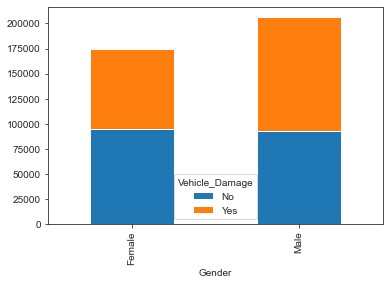

<Figure size 1152x504 with 0 Axes>

In [42]:
df3 = (df.groupby('Vehicle_Damage')['Gender']
           .value_counts(normalize=True)
           .reset_index(name='perc'))

print((df3).to_markdown())

pd.crosstab(df['Gender'],df['Vehicle_Damage']).plot.bar(stacked=True) # Homens sofrem mais acidentes!

plt.figure(figsize=(16,7))


Gênero x Interesse em Seguro

|    |   Response | Gender   |     perc |
|---:|-----------:|:---------|---------:|
|  0 |          0 | Male     | 0.530994 |
|  1 |          0 | Female   | 0.469006 |
|  2 |          1 | Male     | 0.610683 |
|  3 |          1 | Female   | 0.389317 |


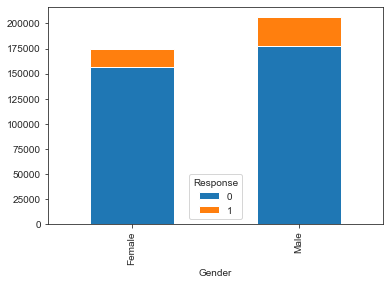

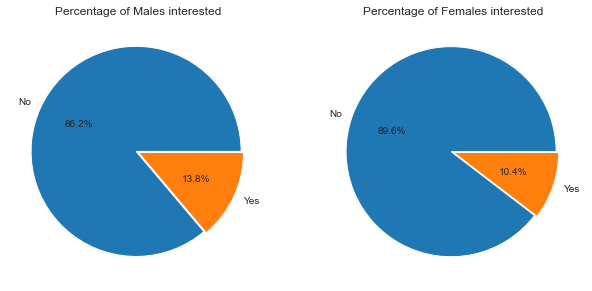

In [35]:
df4 = (df.groupby('Response')['Gender']
           .value_counts(normalize=True)
           .reset_index(name='perc'))

print((df4).to_markdown())

pd.crosstab(df['Gender'],df['Response']).plot.bar(stacked=True) # Logo, demonstrm mais interesse em seguro? (na pesquisa)

plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
plt.pie(male['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Males interested')

plt.subplot(1,3,2)
plt.pie(female['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Females interested')
plt.show()


In [81]:
pd.pivot_table(df,index=["Gender"],values=["Annual_Premium","Vintage"],aggfunc=[np.sum,len], margins=True)

# aggfunc=np.sum traz a soma, o padrão (sem parâmetro) é a média
#            len traz a contagem

sum                      len        
       Annual_Premium   Vintage Annual_Premium Vintage
Gender                                                
Female   5.337373e+09  27053877       175020.0  175020
Male     6.310991e+09  31769305       206089.0  206089
All      1.164836e+10  58823182       381109.0  381109

Idade Carro x Interesse em Seguro

<AxesSubplot:xlabel='Vehicle_Age'>

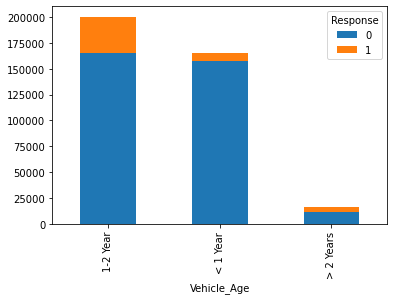

In [16]:
pd.crosstab(df['Vehicle_Age'],df['Response']).plot.bar(stacked=True)# intermediário (1-2) é o grupo c maior tendência

Idade do Carro x Dano Veículo

<AxesSubplot:xlabel='Vehicle_Age'>

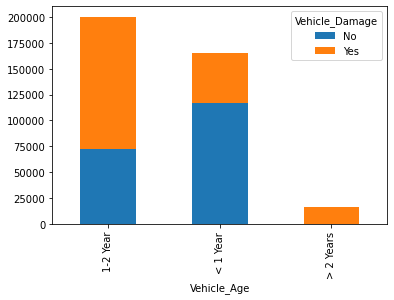

In [21]:
pd.crosstab(df['Vehicle_Age'],df['Vehicle_Damage']).plot.bar(stacked=True) # depois de dois anos o veículo já sofreu algum dano
                                                                           # faixa muito maior no grupo intermediário
                                                                           # *pessoas trocam de carro?
                                                                           # *ficam mais descuidados? 

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

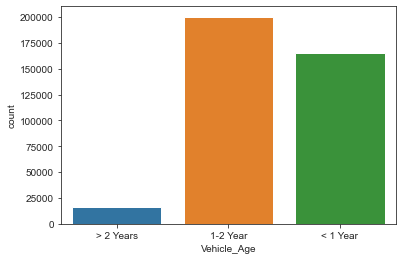

In [15]:
sns.countplot(x = df["Vehicle_Age"]) # a quantidade de usuários c veículos entre 1-2 anos é maior em relação às outras, se houvesse muita diferença entre as demais,
                                     # o gráfico acima poderia se tornar tendencioso

Série Temporal em relação à Precaução sobre Seguro

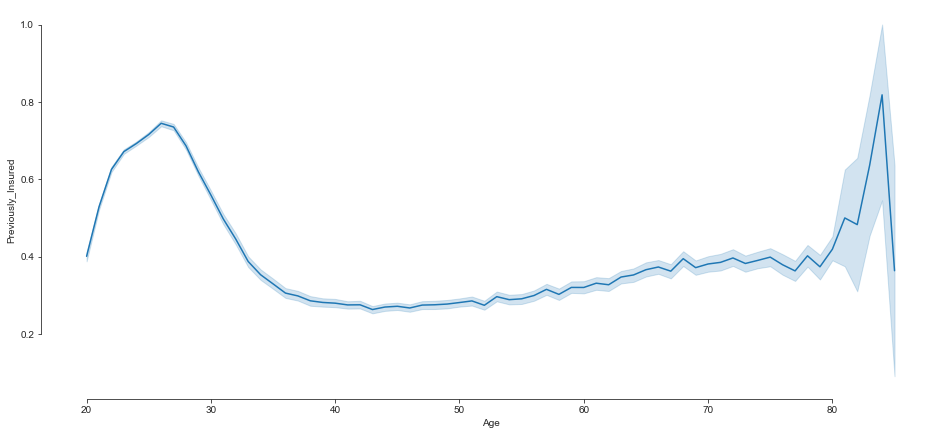

In [27]:

r = sns.relplot(data=df,x='Age',y='Previously_Insured',kind='line') # Temos dois picos na faixa jovem e idoso
r.fig.set_size_inches(14, 6)                                        # Maior tendência antecedendo essas faixas?
sns.despine(offset=5, trim=True)
sns.set_style("ticks") 

### Precisamos analisar as variáveis Policy_Sales e Region_Code:
1) Policy_sales: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.  
2) Region_Code: Unique code for the region of the customer.

Seria interessante analisarmos se existe relação entre os valores mais frequentes destas duas variáveis com a variável target.

In [4]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


Proporção: Channel
152.0    0.353663
26.0     0.209127
124.0    0.194157
160.0    0.057146
156.0    0.027974
           ...   
149.0    0.000003
143.0    0.000003
43.0     0.000003
41.0     0.000003
84.0     0.000003
Name: Policy_Sales_Channel, Length: 155, dtype: float64


[]

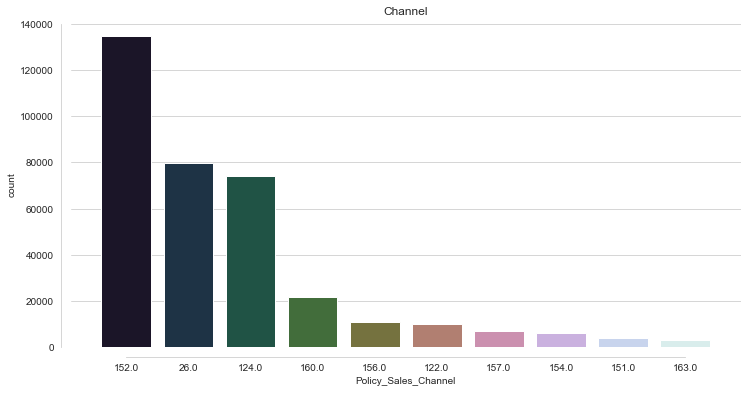

In [7]:
#Top 4 canais mostram grande diferença em relação aos demais

plt.figure(figsize = (12, 6))
df['Policy_Sales_Channel'].value_counts()
print('Proporção: Channel')
print(df['Policy_Sales_Channel'].value_counts().sort_values(ascending=False) \
      / df['Policy_Sales_Channel'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, x='Policy_Sales_Channel',palette="cubehelix", order=df['Policy_Sales_Channel'].value_counts().head(10).index)
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
plt.title('Channel')
plt.plot()

Regiões mais presentes na pesquisa
28.0    0.279225
8.0     0.088891
46.0    0.051820
41.0    0.047921
15.0    0.034919
30.0    0.031988
29.0    0.029034
50.0    0.026877
3.0     0.024274
11.0    0.024224
36.0    0.023083
33.0    0.020083
47.0    0.019511
35.0    0.018215
6.0     0.016478
45.0    0.014707
37.0    0.014434
18.0    0.013521
48.0    0.012283
14.0    0.012275
39.0    0.012185
10.0    0.011477
21.0    0.011194
2.0     0.010595
13.0    0.010590
7.0     0.008604
12.0    0.008391
9.0     0.008137
27.0    0.007407
32.0    0.007313
43.0    0.006925
17.0    0.006867
26.0    0.006788
25.0    0.006568
24.0    0.006337
38.0    0.005316
0.0     0.005303
16.0    0.005266
31.0    0.005143
23.0    0.005143
20.0    0.005077
49.0    0.004807
4.0     0.004726
34.0    0.004366
19.0    0.004028
22.0    0.003435
40.0    0.003398
5.0     0.003356
1.0     0.002645
44.0    0.002120
42.0    0.001551
52.0    0.000701
51.0    0.000480
Name: Region_Code, dtype: float64


[]

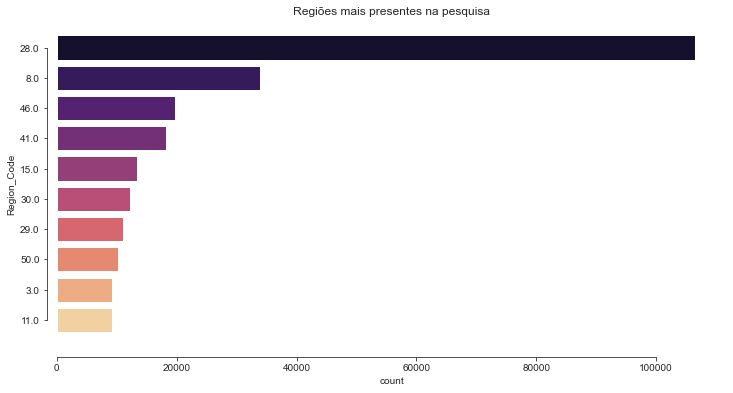

In [11]:
plt.figure(figsize = (12, 6))
df['Region_Code'].value_counts()
print('Regiões mais presentes na pesquisa')
print(df['Region_Code'].value_counts().sort_values(ascending=False) \
      / df['Region_Code'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, y='Region_Code', order=df['Region_Code'].value_counts().head(10).index, palette="magma")
sns.despine(offset=10, trim=True);            
sns.set_style("ticks")
plt.title('Regiões mais presentes na pesquisa')
plt.plot()